<a href="https://colab.research.google.com/github/nuriaprol/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PRACTICA4_GRUPO6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ufv.es/wp-content/uploads/2023/03/logo-UFV-scaled.jpg" alt="Logo de Colab" width="200">

# <font color='00008B'>GRUPO 6.</font>
##### Laura Lirón Carrión, Alberto Muñoz Gutierrez, Nuria Prol Vecoña.

# <font color='00008B'>PRÁCTICA 4.</font>
El objetivo de esta práctica es encontrar los máximos y minimos de 2 funciones siguiendo el algoritmo genético.

In [83]:
!pip install deap

In [64]:
!pip install matplotlib

In [65]:
!pip install numpy

In [66]:
!pip install scipy

In [67]:
!pip install scoop

In [68]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# **EJERCICIO 1**

---



---



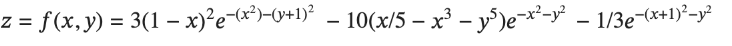

En el dominio:

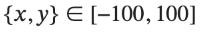



Se encontrará el máximo de la función a partir del algoritmo genético, aunque el uso de AGs no nos da certeza de obtener la solución óptima, si obtendremos una solución bastante buena y en un tiempo razonable.

In [69]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res = 3*(1 - x[0])**(2)*np.exp(-((x[0]**2)+(x[1]+1)**2)) - 10*(x[0]/5 -x[0]**(3) - x[1]**(5))*np.exp((-x[0]**(2)-x[1]**(2))) -1/3*np.exp((-(x[0]+1)**(2)-x[1]**(2)))
    return res

Representamos gráficamente la función con el objetivo de analizar la naturaleza del problema al que nos estamos enfrentando. La visualización se hará en el intervalo de -100 a 100 con el propósito de examinar el dominio de la función en esa región.

In [70]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)

In [71]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

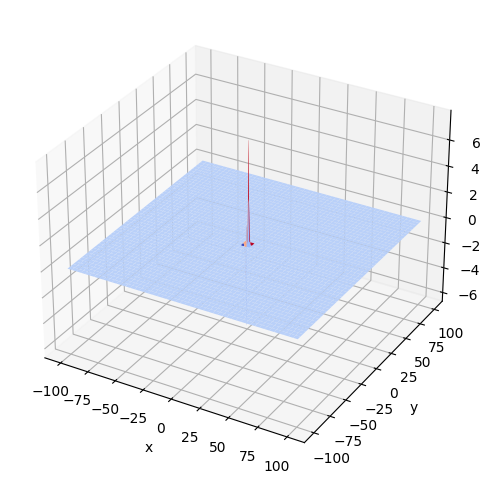

In [72]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

plt.show()

Dado que la función tiene todos los puntos de interés en el centro, vamos a reducir el dominio de estudio para analizar el máximo entre -4 y 4. Esto nos permitirá adaptar el problema para lograr una convergencia más rápida.

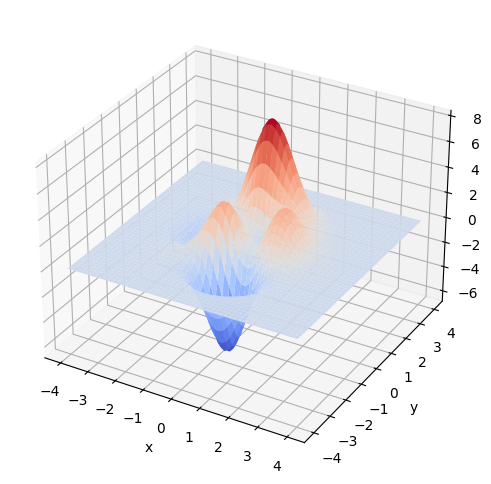

In [73]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

plt.show()

## Un punto de cruce:

`creator.create("FitnessMax", base.Fitness, weights=(1.0,)`

Definimos el problema de optimización especificando que se desea maximizar el valor de la aptitud al utilizar FitnessMax. En este contexto, la aptitud representa qué tan buena es una solución.

`creator.create("Individual", list, fitness=creator.FitnessMax)`

Especificamos que a las soluciones candidatas se les llamará individuo, esta soluciones tendrán un formato de lista y cada uno tendrá su fitness relacionado. (Lo que vale ese individuo en la función objetivo)

Las soluciones candidatas son las posibles respuestas que se consideran en el espacio de búsqueda del problema. Cada par de x e y en el intervalo de -4 a 4 se considera una solución candidata, la cual se evaluará para obtener su valor de fitness.



`def funcion_objetivo(x):
    for i in range(len(x)):
        if x[i] > 4 or x[i] < -4:
            return -1,
    res = 3*(1 - x[0])**(2)*np.exp(-((x[0]**2)+(x[1]+1)**2)) - 10*(x[0]/5 -x[0]**(3) - x[1]**(5))*np.exp((-x[0]**(2)-x[1]**(2))) -1/3*np.exp((-(x[0]+1)**(2)-x[1]**(2)))
    return res,`

Se define la función objetivo que se va a estudiar, con la restricción de que si se sale del rango de estudio [ -4 , 4 ] se le penalizará aplicándole un  fitness de -1. Esto es así ya que como estamos maximizando, si el fitness de un individuo entonces no será considerado para las siguientes generaciones.

Se especifica ahora:

1.   Función para crear los individuos de forma aleatoria:
`toolbox.register("attr_uniform", random.uniform, -4, 4)`

Se generan los genes de los cromosomas del individuo de manera aleatoria entre -4 y 4 (dominio donde estudiamos la función)siguiendo una distribución normal

2.   Función para crear la población

`toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)`

Especificamos que cada individuo está formado por dos cromosomas, que serán x e y, cada uno con sus genes correspondientes.

`toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 12)`

Establecemos el tamaño de la población inicial en 12 individuos. Dado que nuestro rango es de -4 a 4 y requerimos 3 bits para representar los 8 valores posibles de x, y otros 3 bits para representar los valores de y, por lo que l es 6.

Entonces, 2l sería 12. Aseguramos que nuestra población inicial se encuentre en el rango [l, 2l], lo cual contribuye a la convergencia efectiva del algoritmo.

3. Operadores genéticos (selección, cruce y mutación)


> Selección: `toolbox.register("select", tools.selTournament, tournsize=3)`

Elegimos de que manera se van a seleccionar las parejas candidatas, será por torneo.
En selección por torneo se escoge un número al azar de individuos de la población, este este caso 3 y se selecciona el mejor individuo de esos 3, este será el primer padre. Se repite este proceso hasta que el número de individuos seleccionados sea 12 (tamaño de la población) de esta forma se tendrán 6 parejas.

> Cruce: `toolbox.register("mate", tools.cxOnePoint)`

Se utiliza un punto de cruce, el cual es dividir el fenotipo de cada padre en un mismo punto. El primer hijo de la pareja se creará a partir de la cabeza del primer padre con la cola del segundo padre y el segundo hijo lo contrario.

> Mutación: `toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)`


Se relizará una mutación gaussiana donde la media de distribución será 0, la desviación 5 y la probabilidad de mutar cada gen será 0.1.



**SELECIÓN DE PARÁMETROS**

`CXPB, MUTPB, NGEN = 0.4, 0.8, 50`

**Se elige una probabilidad de punto de cruce de 0.4.**


El cruce se centra en la explotación, se refiere a la capacidad del algoritmo genético para aprovechar las buenas soluciones ya presentes en la población actual. Ponemos el porcentaje bajo ya que así preservamos la diversidad genética, que explore soluciones y no se centre un conjunto limitado de soluciones. También el porcentaje bajo preserva las soluciones locales, y como nuestra función tiene los puntos máximos de interés en una zona específica, entonces de esta forma realizamos cambios más finos en los individuos de cada generación.


**Se elige una probabilidad de mutación de 0.8.**

El punto de cruce está relacionado con la exploración que es la capacidad del algoritmo para buscar soluciones en diferentes regiones del espacio de búsqueda. Al ver la función en el rango -4 4 podemos ver como el algoritmo se puede quedar atrapado en los dos máximos locales que tiene. Es por esto que aumentamos la probabilidad de punto de cruce hasta 0.8. Al ser alta se permite una mezcla más frecuente de las características genéticas de los padres.

Estos valores se han encontrado de manera empírica, es decir probando y viendo con que valores funciona mejor. Sacando conclusiones con distintas pruebas.

Este algoritmo se ejecuta para 50 generaciones, se reliza 50 veces.


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	std     	min      	max    
0  	12    	0.207027	0.915965	-0.691521	3.11159
1  	11    	-0.188312	0.581882	-1.89127 	0.283632
2  	9     	0.113011 	0.513928	-1       	1.46515 
3  	8     	0.364683 	0.504262	0.0388627	1.46515 
4  	10    	-0.0462219	0.997053	-2.87807 	1.46515 
5  	8     	0.586954  	0.507194	0.283632 	1.46515 
6  	12    	-0.647109 	1.64846 	-2.87807 	1.46515 
7  	11    	0.578864  	1.2057  	-2.87807 	1.46515 
8  	11    	0.535669  	1.31875 	-2.87807 	1.46515 
9  	11    	1.30852   	0.410638	0.000252115	1.46515 
10 	11    	1.46515   	0       	1.46515    	1.46515 
11 	9     	1.27413   	0.633559	-0.827149  	1.46515 
12 	12    	1.04098   	0.913801	-1         	1.46515 
13 	10    	1.25972   	0.681332	-1         	1.46515 
14 	10    	1.13764   	0.760266	-1         	1.46515 
15 	10    	1.29729   	0.703682	-1         	1.91591 
16 	10    	1.4043    	0.472083	-0.0511184 	1.91591 
17 	11    	1.26663   	1.27943 	-2.60007   	1.91591 
18 	12    	1.75779   	0.524442	0.0184103 

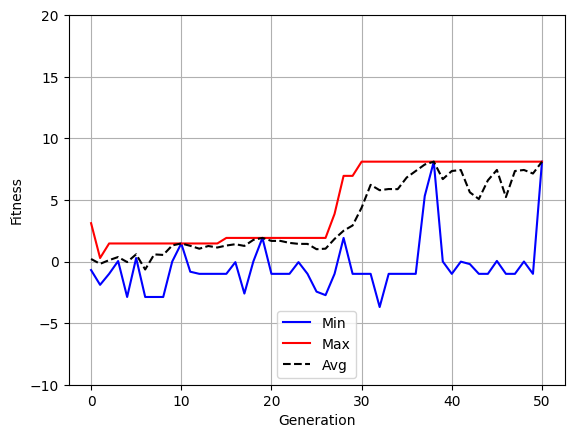

In [74]:
random.seed(42)
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 4 or x[i] < -4: #CAMBIAMOS EL RANGO A -5, 5
            return -1,
    res = 3*(1 - x[0])**(2)*np.exp(-((x[0]**2)+(x[1]+1)**2)) - 10*(x[0]/5 -x[0]**(3) - x[1]**(5))*np.exp((-x[0]**(2)-x[1]**(2))) -1/3*np.exp((-(x[0]+1)**(2)-x[1]**(2)))
    return res,

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -4, 4)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2) #X E Y
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 12)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)

toolbox.register("mate", tools.cxOnePoint)

toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 20])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.4, 0.8, 50
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof)

    return hof, logbook

best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

**EXPLICACIÓN DE LA GRÁFICA**

Los fenómenos que se pueden ver en la gráfica son al principio se muestra mayor exploración, ya que se mantiene entre los valores 0 y 2, probando soluciones en ese rango, a partir de la época 20 explora la función enconrando valores más altos y continua con la exploración de esa nueva zona

## Dos puntos de cruce

 En el crossover de dos puntos, se seleccionan dos puntos de corte aleatorios a lo largo de los cromosomas de ambos padres. La información genética entre los dos puntos se intercambia entre los padres para generar los descendientes. La cola y cabeza genetica del primer padre se mantienen para el primer hijo y el medio sera el medio del segundo padre. Es decir para los hijos solo se intercambian los genes que se encuentran entre ambos puntos de cruce.

gen	nevals	avg     	std     	min      	max    
0  	12    	0.207027	0.915965	-0.691521	3.11159
1  	10    	-0.276232	0.629425	-1.89127 	0.283632
2  	11    	-0.179109	0.599055	-1.89127 	0.283632
3  	11    	-0.325415	0.683723	-1.89127 	0.459304
4  	8     	0.137675 	0.141965	-0.00298312	0.459304
5  	9     	0.27866  	0.478531	0.0436572  	1.81781 
6  	10    	0.651455 	0.682734	0.0265859  	1.81781 
7  	11    	0.818011 	0.713549	0.0492691  	1.81781 
8  	12    	1.00904  	1.06845 	-1         	1.81781 
9  	11    	1.58246  	0.543051	0.0775542  	1.81781 
10 	11    	1.34818  	1.05014 	-1         	1.81781 
11 	10    	1.57716  	0.76018 	-0.941335  	1.81781 
12 	10    	1.81781  	4.44089e-16	1.81781    	1.81781 
13 	12    	1.47132  	0.831426   	-1         	1.81781 
14 	11    	1.6663   	0.502513   	-0.000347263	1.81781 
15 	9     	1.81781  	4.44089e-16	1.81781     	1.81781 
16 	11    	1.81781  	4.44089e-16	1.81781     	1.81781 
17 	10    	1.30454  	0.978855   	-1          	2.11757 
18 	11    	1.56539  	0.

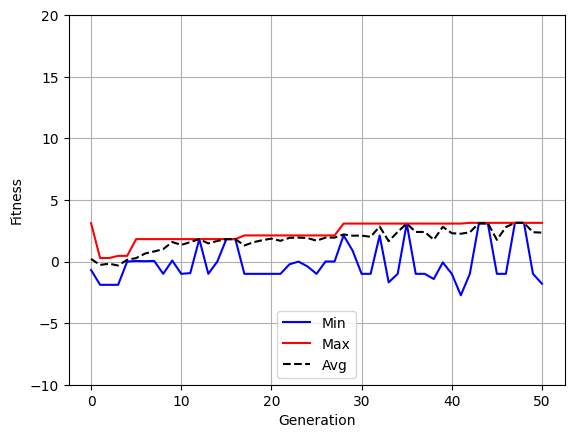

In [75]:
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -4, 4)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2) #X E Y
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 12)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)

toolbox.register("mate", tools.cxTwoPoint)

best2, log2 = main()
print("Mejor fitness: %f" %best2[0].fitness.values)
print("Mejor individuo %s" %best2[0])
plot_evolucion(log2)

**EXPLICACIÓN DE LA GRÁFICA**

En este caso solo se observa explotación en la gráfica ya que solo se mantiene en un mismo rango de valores, esto puede ocurrir porque dos puntos de cruce preserva mayor cantidad de información entre generaciones. Dos puntos de cruce está más enfocado a la exploración

---

Al probar los parametros cambiados para que el algoritmo llegue al máximo con un punto de cruce funcionan mal con dos puntos de cruce, esto pasa porque en el cruce con dos puntos se preserva mayor información de los padres, por lo que puede existir menor diversidad genética entre generacion; por lo que se deben ajustar otra vez los parámetros.

 **SELECCIÓN DE PARÁMETROS**

 Para este modelo a diferencia del pasado se prueba otra forma para seleccionar las parejas candidatas, que es seleccionarlas por selBest.
 Al elegir esto estamos obligando al algoritmo a mantener a los individuos mejores adaptados (valores que maximicen la función) en las próximas generaciones. Esta estrategia de selección prioriza la explotación al seleccionar individuos mejor adaptados. Como selBest se centra en la explotación, la combinación con el cruce de dos puntos puede conseguir un buen equilibrio entre explotación y exploración.

`CXPB, MUTPB, NGEN = 0.5, 0.3, 5`

**Se elige una probabilidad de punto de cruce de 0.5.**

Esta probabilidad al ser moderada, en promedio la mitad de los individuos por generación se crucarán. Esto generará que se explore la función.

**Se elige una probabilidad de mutación de 0.3.**
Como sel best se centra ya en la explotación no hace falta poner un porcentaje algo de mutación.


gen	nevals	avg     	std     	min      	max    
0  	12    	0.207027	0.915965	-0.691521	3.11159
1  	7     	0.210299	0.915822	-0.691521	3.11159
2  	8     	0.139402	0.702138	-0.691521	2.2946 
3  	9     	0.793658	2.2596  	-0.691521	7.64503
4  	10    	0.1372  	0.705981	-0.721849	2.2946 
5  	11    	0.693402	2.31683 	-1.11126 	7.64503
6  	8     	0.122383	0.774834	-1.11126 	2.2946 
7  	8     	0.554325	1.04745 	-0.0102401	3.35032
8  	5     	0.554345	1.04744 	-0.0102401	3.35032
9  	9     	0.377137	0.956287	-0.081002 	3.35032
10 	6     	0.375158	1.03865 	-1        	3.35032
11 	5     	0.378092	1.03732 	-1        	3.35032
12 	8     	0.265008	0.783969	-1        	2.33529
13 	7     	0.17488 	0.841427	-1        	2.258  
14 	1     	0.17488 	0.841427	-1        	2.258  
15 	10    	0.0184306	2.10832 	-3.26335  	5.40914
16 	6     	0.611974 	1.70154 	-1        	5.40914
17 	10    	0.0776616	1.48381 	-3.29246  	2.60938
18 	7     	0.0313642	1.47077 	-3.29246  	2.60938
19 	7     	0.887136 	1.63995 	-1        	4.4

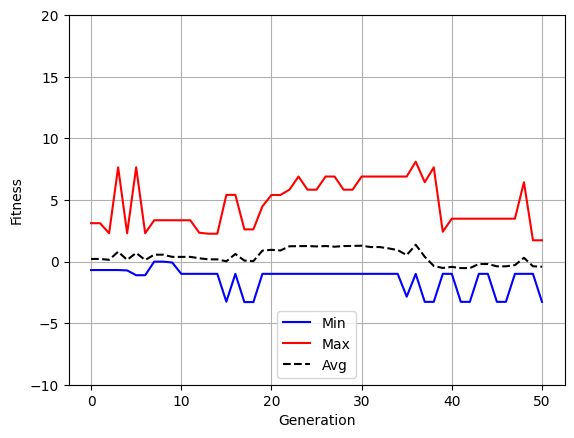

In [76]:
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -4, 4)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2) #X E Y
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 12)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 6, indpb=0.1)

toolbox.register("select", tools.selBest)

def main2():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.3, 50
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof)
    return hof, logbook

best3, log3 = main2()
print("Mejor fitness: %f" %best3[0].fitness.values)
print("Mejor individuo %s" %best3[0])
plot_evolucion(log3)

**EXPLICACIÓN DE LA GRÁFICA**


En el gráfico, se observa una fase inicial de exploración de la función, seguida por un cambio hacia la explotación de soluciones a partir de la quinta generación. Luego, sigue explorando y explotando, hasta que detenemos el proceso en la generación 50. Al emplear la estrategia selBest, se seleccionan y retienen los individuos de mayor rendimiento, lo que puede resultar en la identificación del máximo global, incluso si este fue descubierto en generaciones anteriores, como pasa en este caso.  


Mejor fitness con cruce de un punto y selección por torneo: 8.105780
Mejor fitness con cruce de dos puntos y selección por torneo: 3.139227
Mejor fitness con cruce de dos puntos y selección por sel best: 8.105538


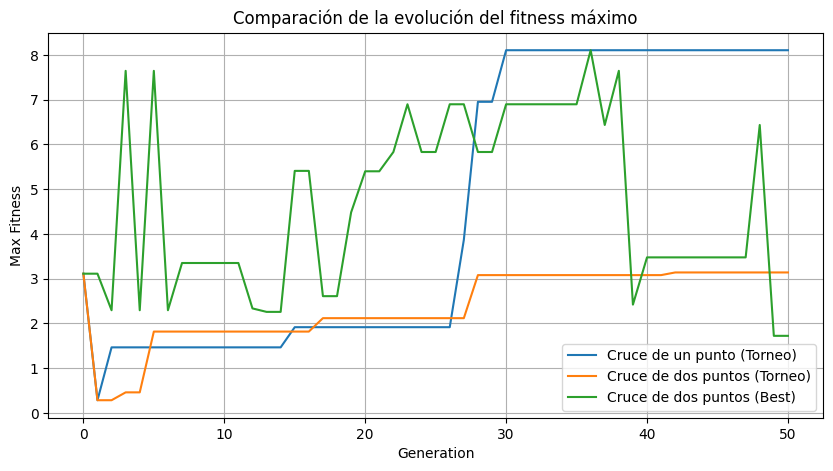

In [77]:
def compare_algorithms():

    # Comparamos los mejores fitness
    print("Mejor fitness con cruce de un punto y selección por torneo: %f" % best[0].fitness.values)
    print("Mejor fitness con cruce de dos puntos y selección por torneo: %f" % best2[0].fitness.values)
    print("Mejor fitness con cruce de dos puntos y selección por sel best: %f" % best3[0].fitness.values)

    # Graficamos la evolución del fitness para ambos algoritmos
    plot_comparison(log, log2, log3)

def plot_comparison(log, log2, log3):
    gen1 = log.select("gen")
    max1 = log.select("max")
    gen2 = log2.select("gen")
    max2 = log2.select("max")
    gen3 = log3.select("gen")
    max3 = log3.select("max")

    plt.figure(figsize=(10, 5))
    plt.plot(gen1, max1, label="Cruce de un punto (Torneo)")
    plt.plot(gen2, max2, label="Cruce de dos puntos (Torneo)")
    plt.plot(gen3, max3, label="Cruce de dos puntos (Best)")
    plt.xlabel("Generation")
    plt.ylabel("Max Fitness")
    plt.title("Comparación de la evolución del fitness máximo")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecuta la comparación
compare_algorithms()

# *EJERCICIO 2*

Para el segundo ejercicio de la práctica, aplicaremos el algoritmo genético, pero esta vez a la función Rastrigin. Además, buscaremos un mínimo en lugar de un máximo.

La función Rastrigin se utiliza ampliamente para evaluar algoritmos de optimización debido a su diseño como una función no lineal desafiante. Su compleja superficie de búsqueda, que no es convencional, la convierte en un terreno ideal para probar la efectividad de estos algoritmos. ¿Por qué es tan útil? Presenta varios mínimos locales y un único mínimo global en cero, lo que supone un reto intrigante para los algoritmos, ya que deben encontrar este punto óptimo. Esta función, formulada en múltiples dimensiones, combina elementos cuadráticos y cosenos, lo que la convierte en una herramienta valiosa para evaluar la capacidad de diferentes algoritmos en cuanto a convergencia y exploración.

In [78]:
def rastrigin(x):
    x_array = np.array(x)
    return 10 * len(x) + np.sum(x_array**2 - 10 * np.cos(2 * np.pi * x_array))

**PLANTEANDO EL PROBLEMA**

`creator.create("FitnessMin", base.Fitness, weights=(-1.0,)`

Tenemos de nuevo un problema de optimización pero en este caso lo que queremos hacer es minimizar el valor de la aptitud con FitnessMin

`creator.create("Individual", list, fitness=creator.FitnessMin)`

llamaremos a las soluciones candidatas individuo, esta soluciones seran de listas y cada una tendrá su fitness relacionado, este es el valor del individuo en la función objetivo.

Cada conjunto de valores para 'x' e 'y' dentro del rango de -5.12 a 5.12 se define como una solución candidata en el espacio de búsqueda del problema. Estas soluciones candidatas serán evaluadas para determinar su respectivo valor de aptitud (fitness).


`def funcion_objetivo(x):
    for i in range(len(x)):
        if x[i] > 5.12 or x[i] < -5.12:
            return 100`

Se establece la función objetivo para análisis, con la especificación de que cualquier valor que exceda el rango de estudio [-5.12, 5.12] será penalizado con un fitness de 100. Esta medida busca minimizar la influencia de valores extremos en el proceso de minimización, descartando aquellos individuos cuyo fitness exceda los límites establecidos y evitando su consideración en las generaciones posteriores.

Seguimos con:

1.   Creamos genes de forma aleatoria:
`toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)`

Los genes de los cromosomas del individuo se generan de forma aleatoria dentro del dominio de estudio de la función, que va de -5.12 a 5.12. Esta selección se realiza siguiendo una distribución normal para asegurar la diversidad y exploración de valores en ese rango específico.

2.   Función para crear la población

`toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2))`

Con cada individuo con dos cromosomas, que serán x e y, cada uno con sus genes correspondientes.

`toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 16)`

Fijamos el tamaño de la población inicial en 16 individuos. Considerando nuestro rango de -5.12 a 5.12, empleamos 4 bits para representar los 10 valores posibles de x y 4 bits para los valores de y, lo que da como resultado una longitud de cromosoma (l) igual a 8.

Por ende, 2l equivale a 16. Garantizamos que nuestra población inicial se ubique en el intervalo [l, 2l], lo cual favorece la convergencia efectiva del algoritmo..

3. Operadores genéticos (selección, cruce y mutación)


> Selección: `toolbox.register("select", tools.selTournament, tournsize=3)`

Elegimos de que manera se van a seleccionar las parejas candidatas, será nuevamente por torneo.

Además, el torneo reduce la presión selectiva, lo que significa que no solo los individuos más aptos tienen la oportunidad de reproducirse.

> Cruce: `toolbox.register("mate", tools.cxOnePoint)`


Se emplea un punto de cruce que divide el fenotipo de cada padre en un punto específico.

> Mutación: `toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)`


Se llevará a cabo una mutación gaussiana con una media de distribución de 0, una desviación estándar de 5 y una probabilidad del 10% de mutar cada gen.

**SELECIÓN DE PARÁMETROS**

`CXPB, MUTPB, NGEN = 0.5, 0.5, 800`

**Se elige una probabilidad de punto de cruce de 0.5.**


El cruce se enfoca en la explotación, lo que implica aprovechar las soluciones prometedoras existentes en la población actual. Al establecer un porcentaje medio, preservamos la diversidad genética, permitiendo así la exploración de una gama más amplia de soluciones en lugar de enfocarnos en un conjunto limitado.


**Se elige una probabilidad de mutación de 0.5.**

Una probabilidad de mutación del 0.5 aumenta la posibilidad de explorar una variedad más extensa de soluciones al permitir cambios más frecuentes en los genes. Esto podría ayudar a encontrar el mínimo total o a escapar de óptimos locales subóptimos.
Sin embargo, una alta tasa de mutación también podría llevar a la pérdida de buenas soluciones existentes en la población. Esto podría dificultar la convergencia hacia un mínimo global si se pierden las características genéticas cruciales para alcanzar ese mínimo.

El algoritmo se ejecuta a lo largo de 800 generaciones, una cantidad aparentemente considerable. Esta cantidad extensa de generaciones permite al algoritmo realizar una búsqueda exhaustiva y óptima, lo que contribuye a explorar de manera más amplia el espacio de soluciones posibles.

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg   	std    	min    	max    
0  	16    	35.955	12.0376	11.5529	53.5077
1  	11    	22.1028	9.30678	11.5529	38.5842
2  	13    	21.4796	20.6488	11.5529	100    
3  	12    	23.8546	28.8131	11.5529	100    
4  	10    	12.0804	0.673658	11.5529	13.9492
5  	15    	11.5985	0.176548	11.5529	12.2823
6  	14    	13.7196	8.39143 	11.5529	46.2194
7  	13    	14.3187	6.16351 	11.5529	31.9537
8  	13    	11.5529	0       	11.5529	11.5529
9  	14    	12.4288	5.98535 	2.95077	34.1686
10 	9     	13.914 	9.09551 	2.95077	38.6206
11 	11    	13.1087	11.6371 	2.95077	49.8977
12 	12    	11.3354	6.70656 	2.95077	33.8781
13 	12    	7.1081 	4.19198 	2.95077	11.5529
14 	12    	2.95077	0       	2.95077	2.95077
15 	13    	15.0758	32.0984 	2.85225	100    
16 	13    	4.16775	4.78981 	2.85225	22.718 
17 	14    	4.13363	4.75951 	2.85225	22.5662
18 	13    	2.87072	0.0384548	2.85225	2.95077
19 	15    	4.17116	4.64951  	2.85225	22.0944
20 	11    	2.85225	0        	2.85225	2.85225
21 	12    	8.92398	23.5157  	2.85225

788	14    	2.32264   	6.27825   	0.00048768	22.2327   
789	10    	15.0373   	32.8272   	0.00048768	100       
790	11    	13.1774   	32.9194   	0.00048768	100       
791	11    	7.51482   	24.3743   	0.00048768	100       
792	10    	4.75805   	10.4125   	0.00048768	31.5728   
793	10    	1.61568   	6.25563   	0.00048768	25.8436   
794	15    	19.2465   	38.8268   	0.00048768	100       
795	13    	8.52939   	24.6698   	0.00048768	100       
796	10    	3.65422   	10.9168   	0.00048768	43.5769   
797	13    	2.64576   	6.99932   	0.00048768	21.4172   
798	7     	8.04204   	24.2747   	0.00048768	100       
799	13    	4.05352   	7.35135   	0.00048768	20.2736   
800	11    	0.00048768	0         	0.00048768	0.00048768
Mejor fitness: 0.000488
Mejor individuo [-0.0009245683020582922, -0.0012662330858788668]


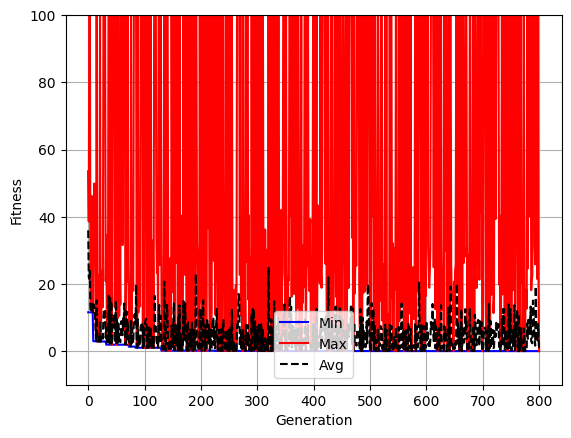

In [79]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 5.12 or x[i] < -5.12:
            return 100,
    res = rastrigin(x)
    return res,

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 16)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 100])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.5, 800
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

best1, log1 = main()
print("Mejor fitness: %f" %best1[0].fitness.values)
print("Mejor individuo %s" %best1[0])
plot_evolucion(log1)

**EXPLICACIÓN DE LA GRÁFICA**

Pese a la gran cantidad de generaciones las cuales dificultan la vision podemos obsevar como se acerca notablemente al mínimo de la función al pasar las 100 generaciones. La solución obtenida se sitúa bastante cercana al valor de 0, que es el objetivo que estamos buscando alcanzar.



## Dos puntos de cruce

Recordemos que como hemos dicho anteriormente en el crossover de dos puntos, se seleccionan dos puntos de corte aleatorios a lo largo de los cromosomas de ambos padres. La información genética entre los dos puntos se intercambia entre los padres para generar los descendientes.


gen	nevals	avg   	std    	min    	max    
0  	16    	35.955	12.0376	11.5529	53.5077
1  	12    	22.1028	9.30678	11.5529	38.5842
2  	16    	40.5749	35.5936	12.2823	100    
3  	9     	15.534 	7.57944	11.5529	42.8655
4  	13    	18.6775	21.3935	11.5529	100    
5  	8     	17.4   	21.3301	11.5529	100    
6  	10    	12.8361	4.59933	11.5529	30.6249
7  	11    	13.0782	5.90747	11.5529	35.9578
8  	12    	16.5064	21.6719	2.36208	100    
9  	12    	12.7096	22.9459	2.36208	100    
10 	13    	10.9348	23.5151	2.36208	100    
11 	11    	11.5326	24.0511	2.36208	100    
12 	13    	9.43734	23.6835	2.36208	100    
13 	11    	2.36208	0      	2.36208	2.36208
14 	14    	8.46445	23.6344	2.36208	100    
15 	12    	5.73379	9.78719	2.36208	40.7235
16 	10    	2.36208	0      	2.36208	2.36208
17 	11    	9.53488	23.7214	2.36208	100    
18 	10    	2.31991	0.163349	1.68726	2.36208
19 	12    	3.46405	4.79775 	1.68726	22.018 
20 	11    	2.06685	0.334767	1.68726	2.36208
21 	11    	1.98249	0.334767	1.68726	2.36208
22 	9    

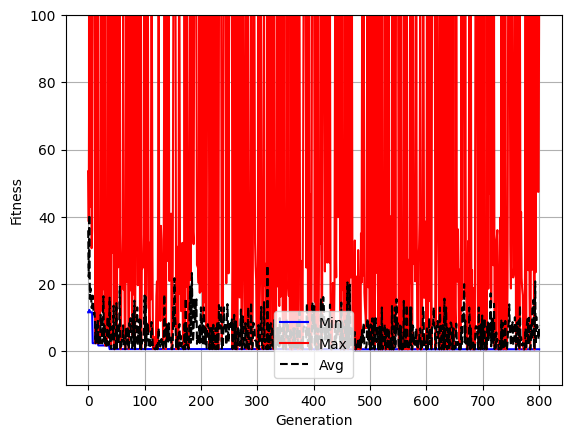

In [80]:
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 16)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxTwoPoint)

best2, log2 = main()
print("Mejor fitness: %f" %best2[0].fitness.values)
print("Mejor individuo %s" %best2[0])
plot_evolucion(log2)

**EXPLICACIÓN DE LA GRÁFICA**

En la observación de las gráficas generadas, se constata que la variación entre una iteración y otra es mínima. Esta situación se atribuye a que el cambio en el nuevo mínimo es notablemente pequeño. A pesar de esta circunstancia, se percibe un deterioro en el rendimiento del algoritmo. Se plantea la posibilidad de realizar ajustes para mejorar la convergencia y evitar la estancamiento en óptimos locales. Este análisis sugiere la necesidad de explorar estrategias adicionales para abordar la optimización del algoritmo genético.

---
Debido a las observaciones realizadas en el ejercicio anterior, en el cual se notó que el cruce de dos puntos preserva mayor información de los padres y puede resultar en menor diversidad genética entre generaciones, se considera necesario ajustar los parámetros del algoritmo genético. Con el fin de abordar esta situación y mejorar la capacidad del algoritmo para encontrar el mejor mínimo, se propone una modificación en los parámetros.

 **SELECCIÓN DE PARÁMETROS**

 En este contexto, se sugiere disminuir la probabilidad de cruce (CXPB) y aumentar la probabilidad de mutación (MUTPB). Estos ajustes están destinados a favorecer una mayor exploración del espacio de búsqueda y mantener una diversidad genética adecuada para el problema en cuestión.

`CXPB, MUTPB, NGEN = 0.5, 0.6, 900`

**Se elige una probabilidad de punto de cruce de 0.5.**

Esta probabilidad al ser moderada, en promedio la mitad de los individuos por generación se cruzarán. Esto generará que se explore la función.

**Se elige una probabilidad de mutación de 0.6.**

Un valor más alto como 0.6 significa que hay una mayor probabilidad de realizar mutaciones en cada generación.

Por otro lado tambien realizamos cambios para

`toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 7, indpb=0.1)`
                 
**El cambio de sigma de 5 a 7**

Este cambio implica aumentar la desviación estándar de la mutación gaussiana. Esta desviación estándar controla cuánto se alejan los nuevos valores mutados de los valores originales.

Un sigma más alto en la mutación gaussiana significa que los cambios introducidos en cada generación tendrán una magnitud mayor.

Mejor fitness: 0.013077
Mejor individuo [-0.00102974532752762, -0.008054112438021174]


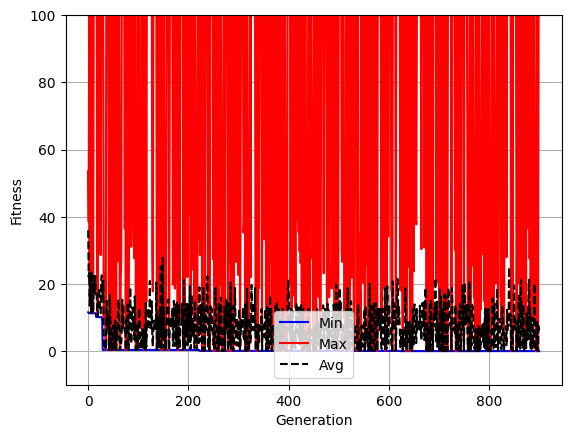

In [81]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 5.12 or x[i] < -5.12:
            return 100,
    res = rastrigin(x)
    return res,

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 16)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 7, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.6, 900
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=False)
    return hof, logbook

best3, log3 = main()
print("Mejor fitness: %f" %best3[0].fitness.values)
print("Mejor individuo %s" %best3[0])
plot_evolucion(log3)

**EXPLICACIÓN DE LA GRÁFICA**

Observamos que en este caso, solo se observa explotación en la gráfica ya que solo se mantiene en un mismo rango de valores que es 0.

Mejor fitness con cruce de un punto: 0.000488
Mejor fitness con cruce de dos puntos: 0.557615
Mejor fitness con cruce de dos puntos con parametros adecuados: 0.013077


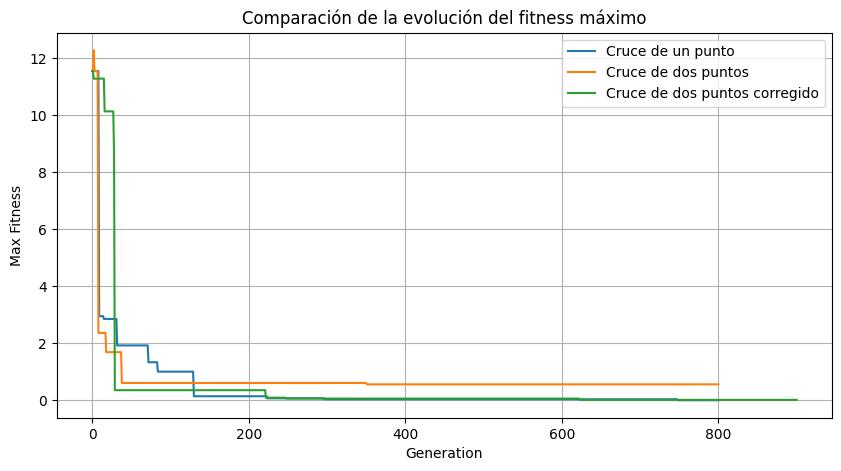

In [82]:
def compare_algorithms():

    # Comparamos los mejores fitness
    print("Mejor fitness con cruce de un punto: %f" % best1[0].fitness.values)
    print("Mejor fitness con cruce de dos puntos: %f" % best2[0].fitness.values)
    print("Mejor fitness con cruce de dos puntos con parametros adecuados: %f" % best3[0].fitness.values)

    # Graficamos la evolución del fitness para ambos algoritmos
    plot_comparison(log1, log2, log3)

def plot_comparison(log1, log2, log3):
    gen1 = log1.select("gen")
    min1 = log1.select("min")
    gen2 = log2.select("gen")
    min2 = log2.select("min")
    gen3 = log3.select("gen")
    min3 = log3.select("min")

    plt.figure(figsize=(10, 5))
    plt.plot(gen1, min1, label="Cruce de un punto")
    plt.plot(gen2, min2, label="Cruce de dos puntos")
    plt.plot(gen3, min3, label="Cruce de dos puntos corregido")
    plt.xlabel("Generation")
    plt.ylabel("Max Fitness")
    plt.title("Comparación de la evolución del fitness máximo")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecuta la comparación
compare_algorithms()